In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [44]:
df = pd.read_csv("D:/Telco_customer_churn.csv")

In [46]:
df.isnull().sum()
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df = pd.get_dummies(df, drop_first=True)

C:\Users\indum\AppData\Local\Temp\ipykernel_11040\1063729918.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [48]:
scaler = StandardScaler()
X = df.drop('Churn_Yes', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['Churn_Yes']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [52]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6886 - loss: 0.6232 - val_accuracy: 0.9617 - val_loss: 0.1216
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9678 - loss: 0.0956 - val_accuracy: 0.9830 - val_loss: 0.0613
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9958 - loss: 0.0149 - val_accuracy: 0.9844 - val_loss: 0.0520
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9851 - val_loss: 0.0500
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9851 - val_loss: 0.0486
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9988 - loss: 0.0028 - val_accuracy: 0.9858 - val_loss: 0.0484
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 1.0000 - loss: 9.1208e-04 - val_accuracy: 0.9858 - val_loss: 0.0466
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 4.8862e-04 - 

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


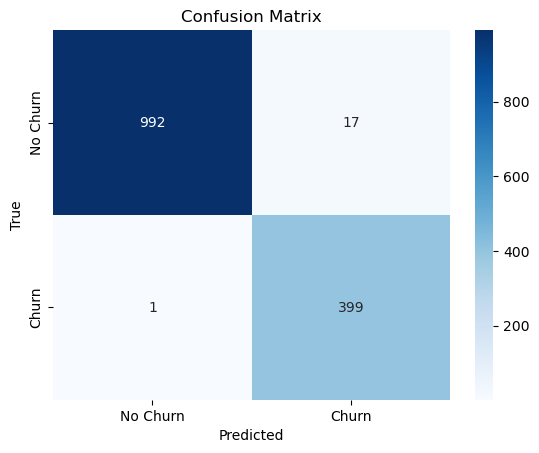

In [56]:
y_pred = (model.predict(X_test) > 0.5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99      1009
        True       0.96      1.00      0.98       400

    accuracy                           0.99      1409
   macro avg       0.98      0.99      0.98      1409
weighted avg       0.99      0.99      0.99      1409



45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


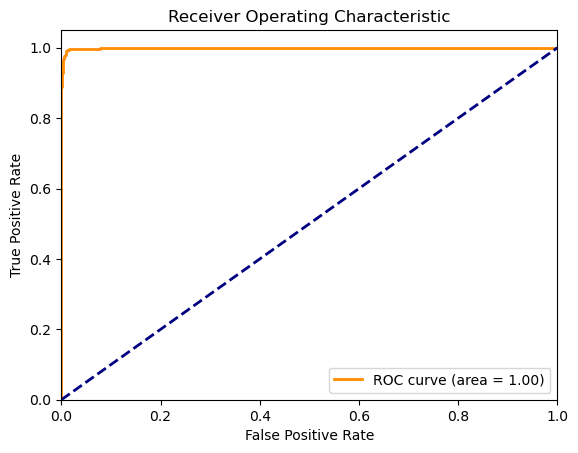

In [60]:
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()